<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4A1810;font-family:sans-serif;color:#FFFFFF;font-size:210%;text-align:center;">UAS Computer Vision</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4A1810;font-family:sans-serif;color:#FFFFFF;font-size:200%;text-align:center;">Bryant Lee Tjandra
    & Franciscus Valentinus Ongkosianbhadra</p>

<p style="font-size:15px;color:#000000;font-weight:500;"> What is the pneumonia? </p>

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus, causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia

<p style="font-size:15px;color:#000000;font-weight:500;"> What is the main cause of pneumonia? </p>

Viruses that infect your lungs and airways can cause pneumonia. The flu (influenza virus) and the common cold (rhinovirus) are the most common causes of viral pneumonia in adults. Respiratory syncytial virus is the most common cause of viral pneumonia in young children

# Import Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2, os, random
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

#____________________________________________________________

import glob
import tensorflow
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#____________________________________________________________

from tqdm.notebook import tqdm
from termcolor import colored

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)
directory = "../input/chest-xray-pneumonia/chest_xray/"


print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

Required libraries were succesfully imported...


In [2]:
print("Current tensorflow version == {}".format(tensorflow. __version__))

Current tensorflow version == 2.11.0


# Load the Datasets

In [3]:
train_df = glob.glob("../input/chest-xray-pneumonia/chest_xray/train/**/*.jpeg")
test_df = glob.glob("../input/chest-xray-pneumonia/chest_xray/test/**/*.jpeg")
validation_df = glob.glob("../input/chest-xray-pneumonia/chest_xray/val/**/*.jpeg")

print(colored("The datasets were succesfully loaded...", color = "green", attrs = ["bold", "dark"]))

The datasets were succesfully loaded...


# Train and Test Sets

In [4]:
train_df[:5], test_df[:5]

(['../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1230_virus_2081.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1513_virus_2632.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person124_virus_238.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person746_virus_1369.jpeg'],
 ['../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1650_virus_2852.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person22_virus_55.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person85_bacteria_417.jpeg'])

# Checking how many Images in each Dataset?

In [5]:
print("There is {} images in the training dataset".format(len(train_df)))
print("There is {} images in the test dataset".format(len(test_df)))
print("There is {} images in the validation dataset".format(len(validation_df)))

There is 5216 images in the training dataset
There is 624 images in the test dataset
There is 16 images in the validation dataset


# Checking how many of the pictures of Pneumonic Lungs and how many of Normal Lungs

In [6]:
datasets, pneumonia_lung, normal_lung = ["train", "test", "val"], [], []

for i in datasets:
    path = os.path.join(directory, i)
    normal = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneumonia = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    normal_lung.extend(normal), pneumonia_lung.extend(pneumonia)

print("The number of pneumonia images is {}".format(len(pneumonia_lung)))
print("The number of non-pneumonia images is {}".format(len(normal_lung)))

The number of pneumonia images is 4273
The number of non-pneumonia images is 1583


# Shuffle Images

In [7]:
random.shuffle(normal_lung)
random.shuffle(pneumonia_lung)
images = normal_lung[:50] + pneumonia_lung[:50]
images[:10]

['../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0525-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0092-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0596-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0592-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0592-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1311-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0531-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0427-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0569-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0066-0001.jpeg']

# View Images in X-ray Format

X-ray imaging creates pictures of the inside of a body. The images show the parts of a body in different shades of black and white. This is because different tissues absorb different amounts of radiation. Calcium in bones absorbs x-rays the most, so bones look white

NORMAL


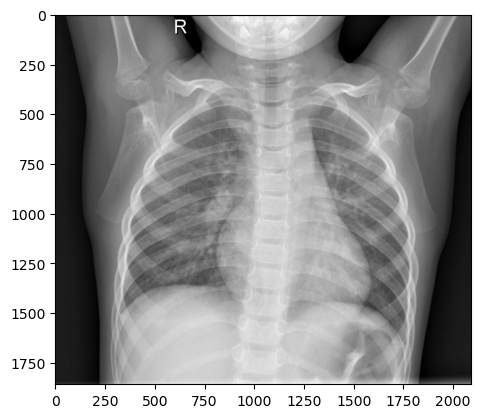

In [8]:
normal_lung_image = load_img("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
print("NORMAL")
plt.imshow(normal_lung_image)
plt.show()

PNEUMONIA


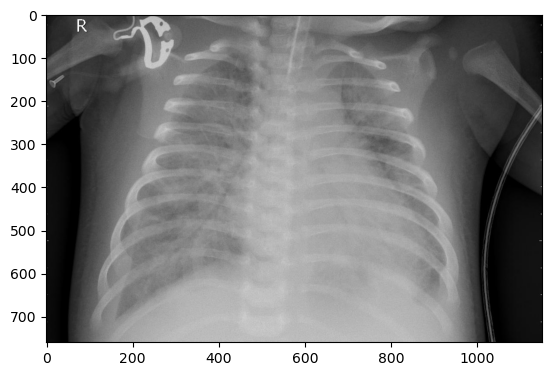

In [9]:
normal_lung_image = load_img("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")
print("PNEUMONIA")
plt.imshow(normal_lung_image)
plt.show()

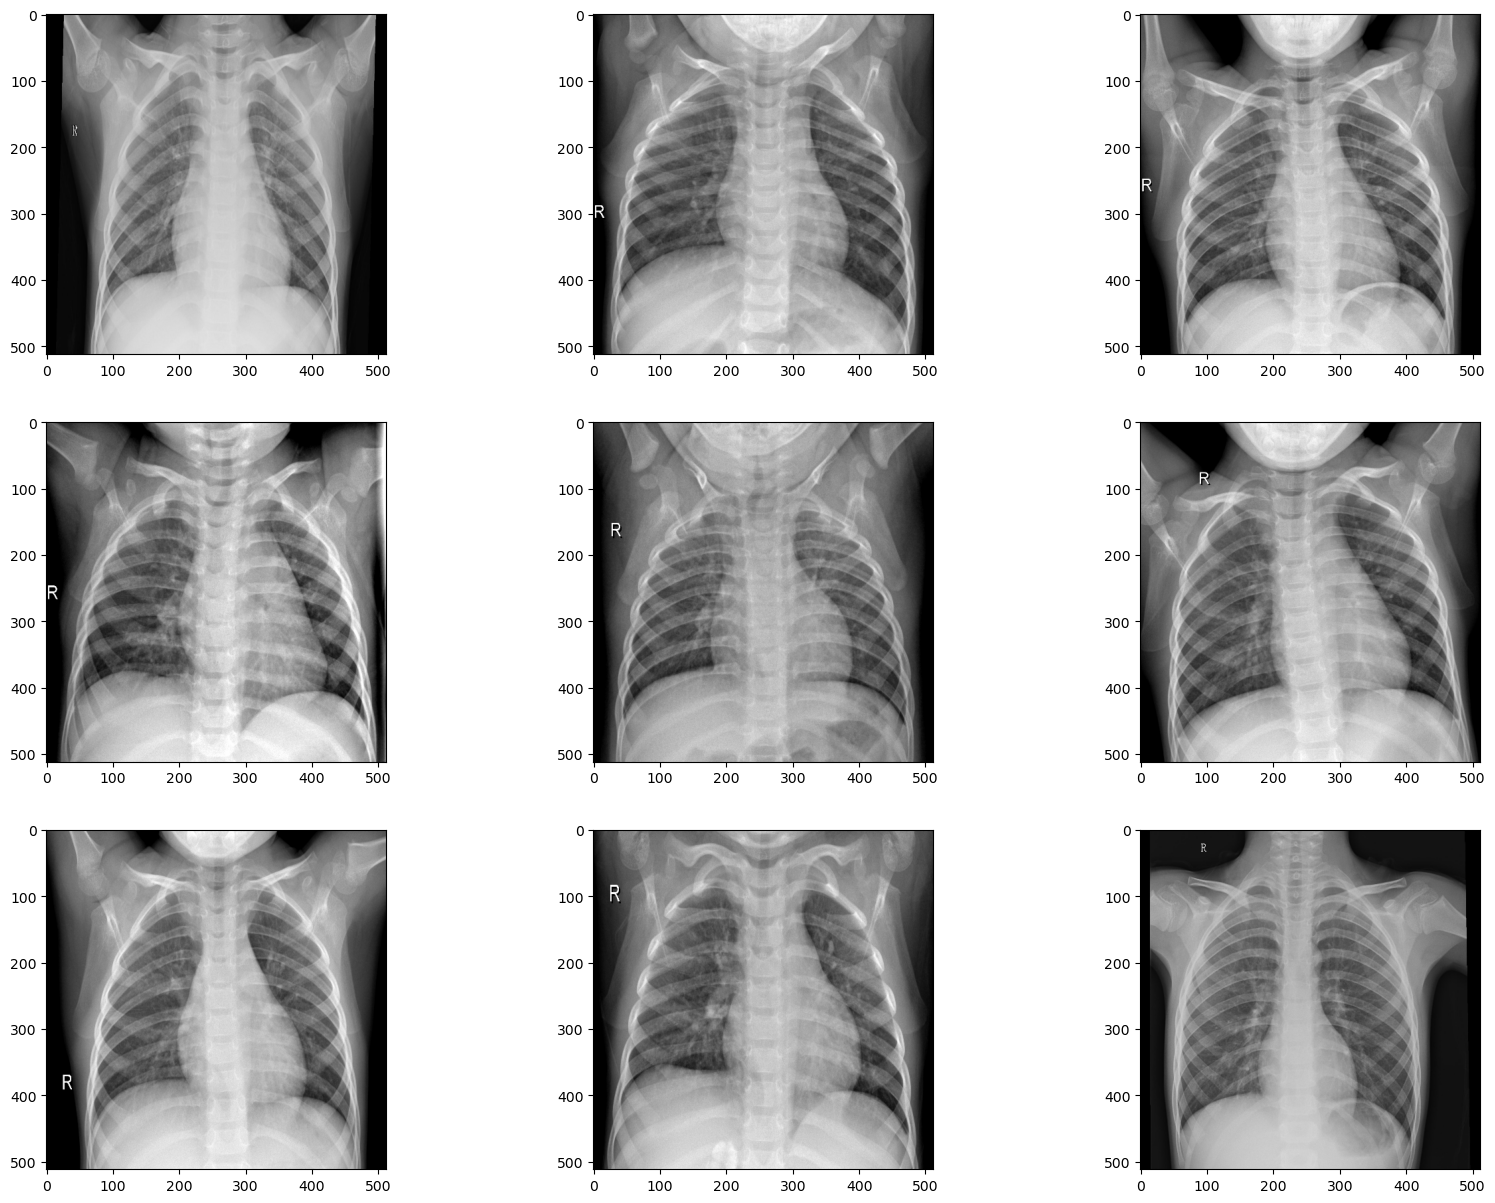

In [10]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

# Image Erosion

Erosion removes pixels on object boundaries. In other words, it shrinks the foreground objects. Enlarge foreground holes. Like in Image Processing Kernels, a larger size of the Structure Element, the effect of Erosion increase.

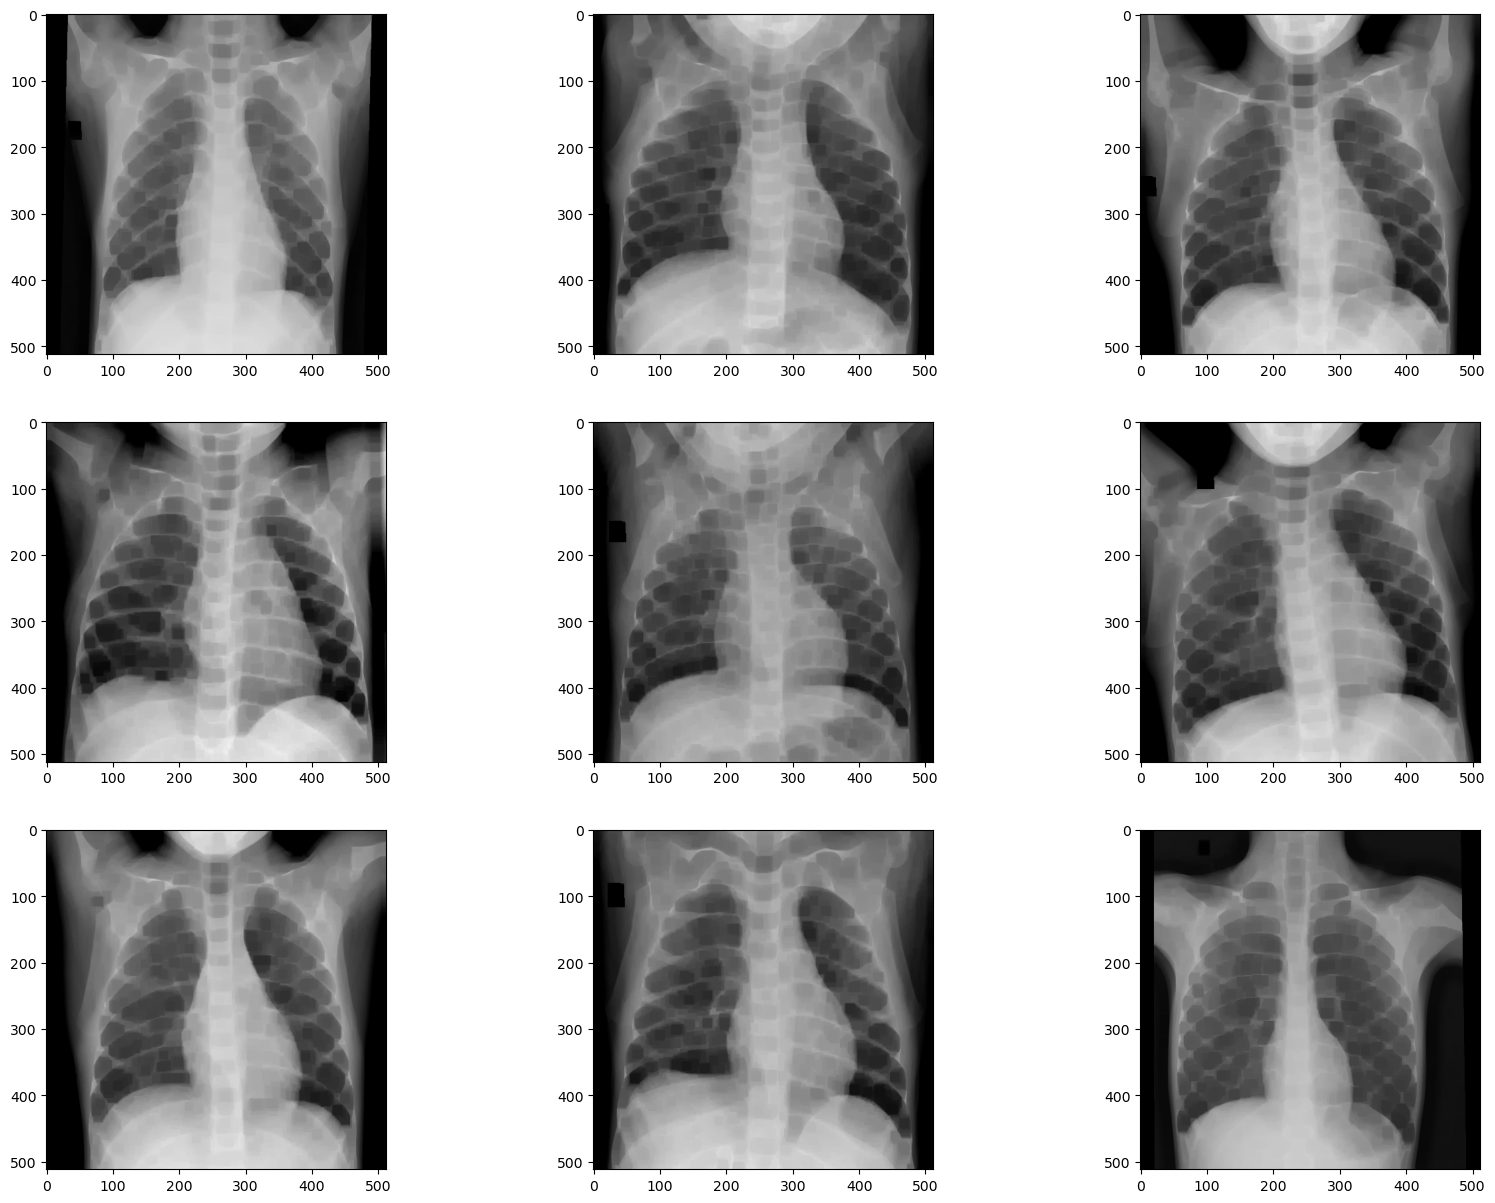

In [11]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_erosion = cv2.erode(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_erosion)

# Image Dilation

Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.

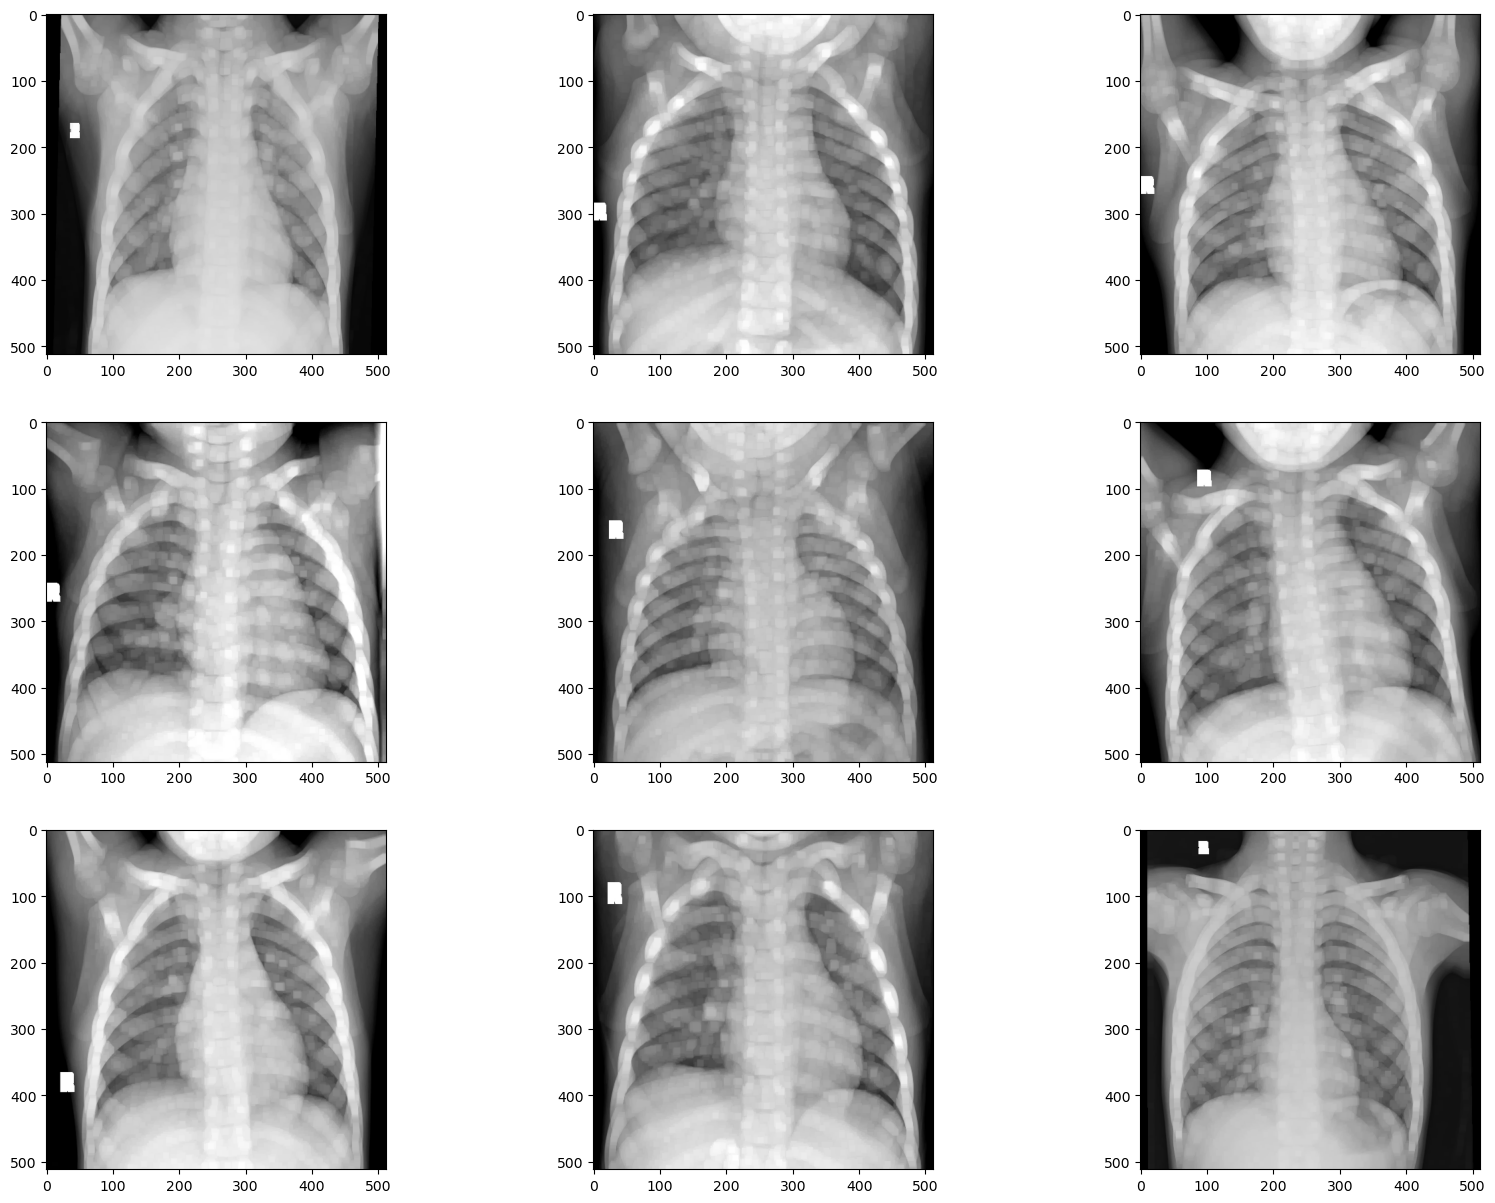

In [12]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_dilation = cv2.dilate(img, kernel, iterations = 2)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_dilation)

# Convert the Images to Greyscale and applying Gaussian Blur

To reduce noise and remove speckles within an image, it is common to apply a Gaussian blur



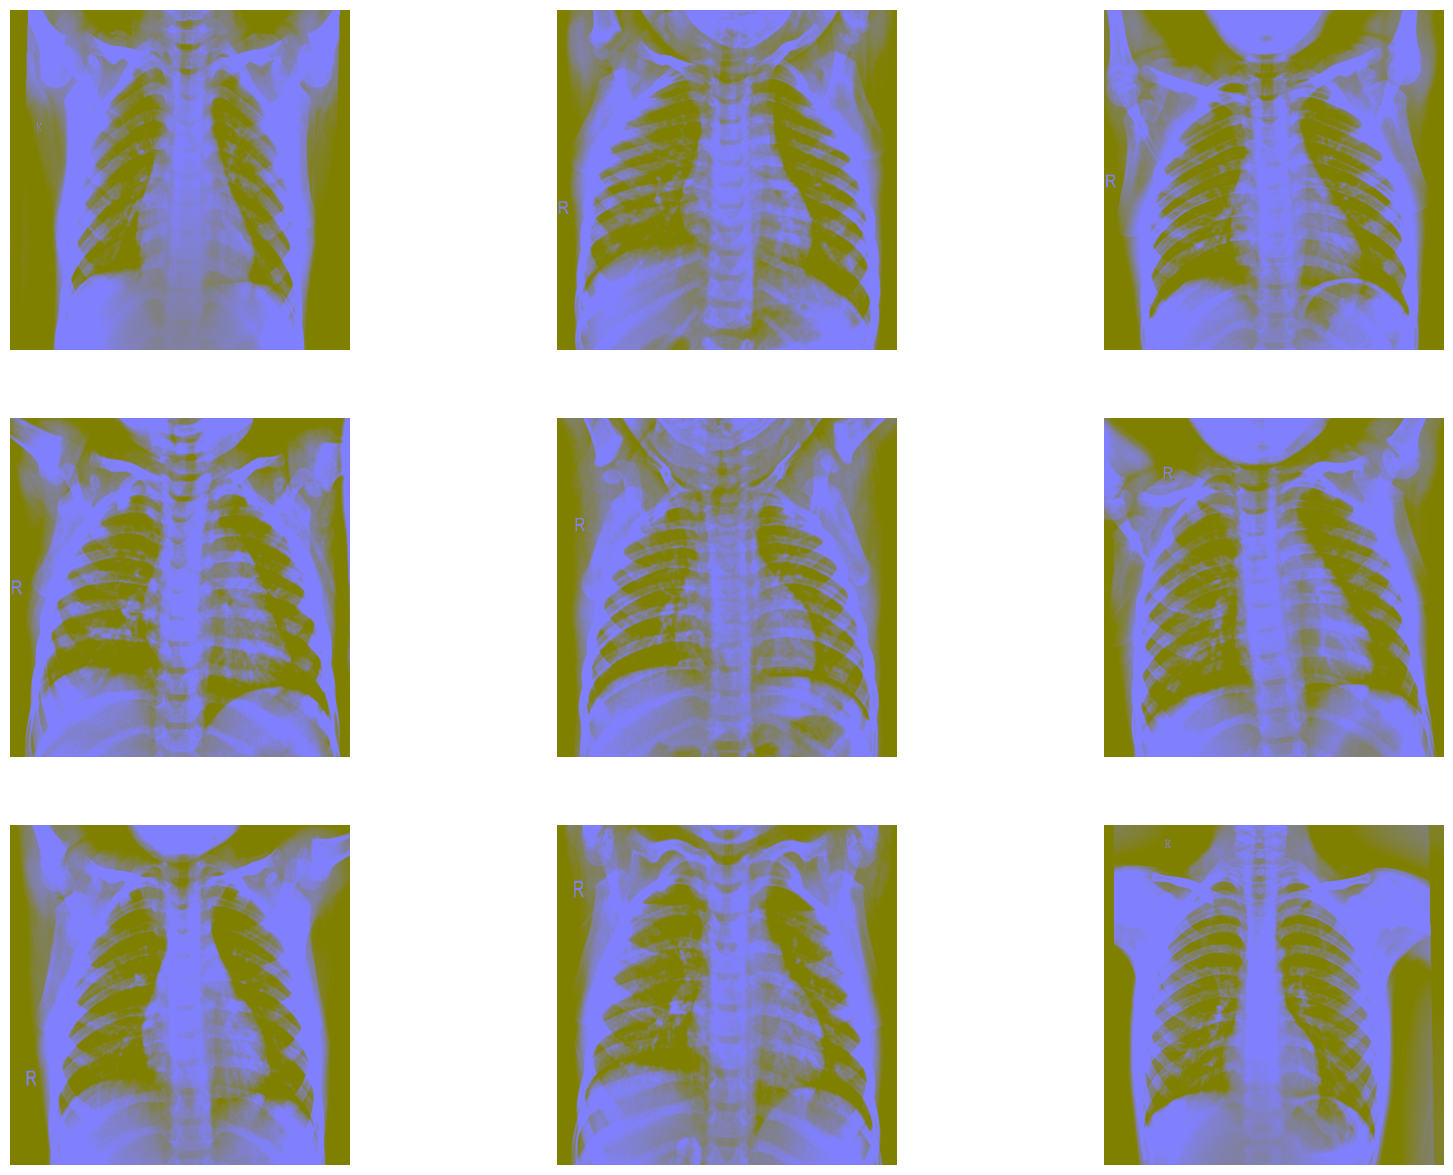

In [13]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

# Canny Edge Detection

Canny edge detection is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed. It has been widely applied in various computer vision systems

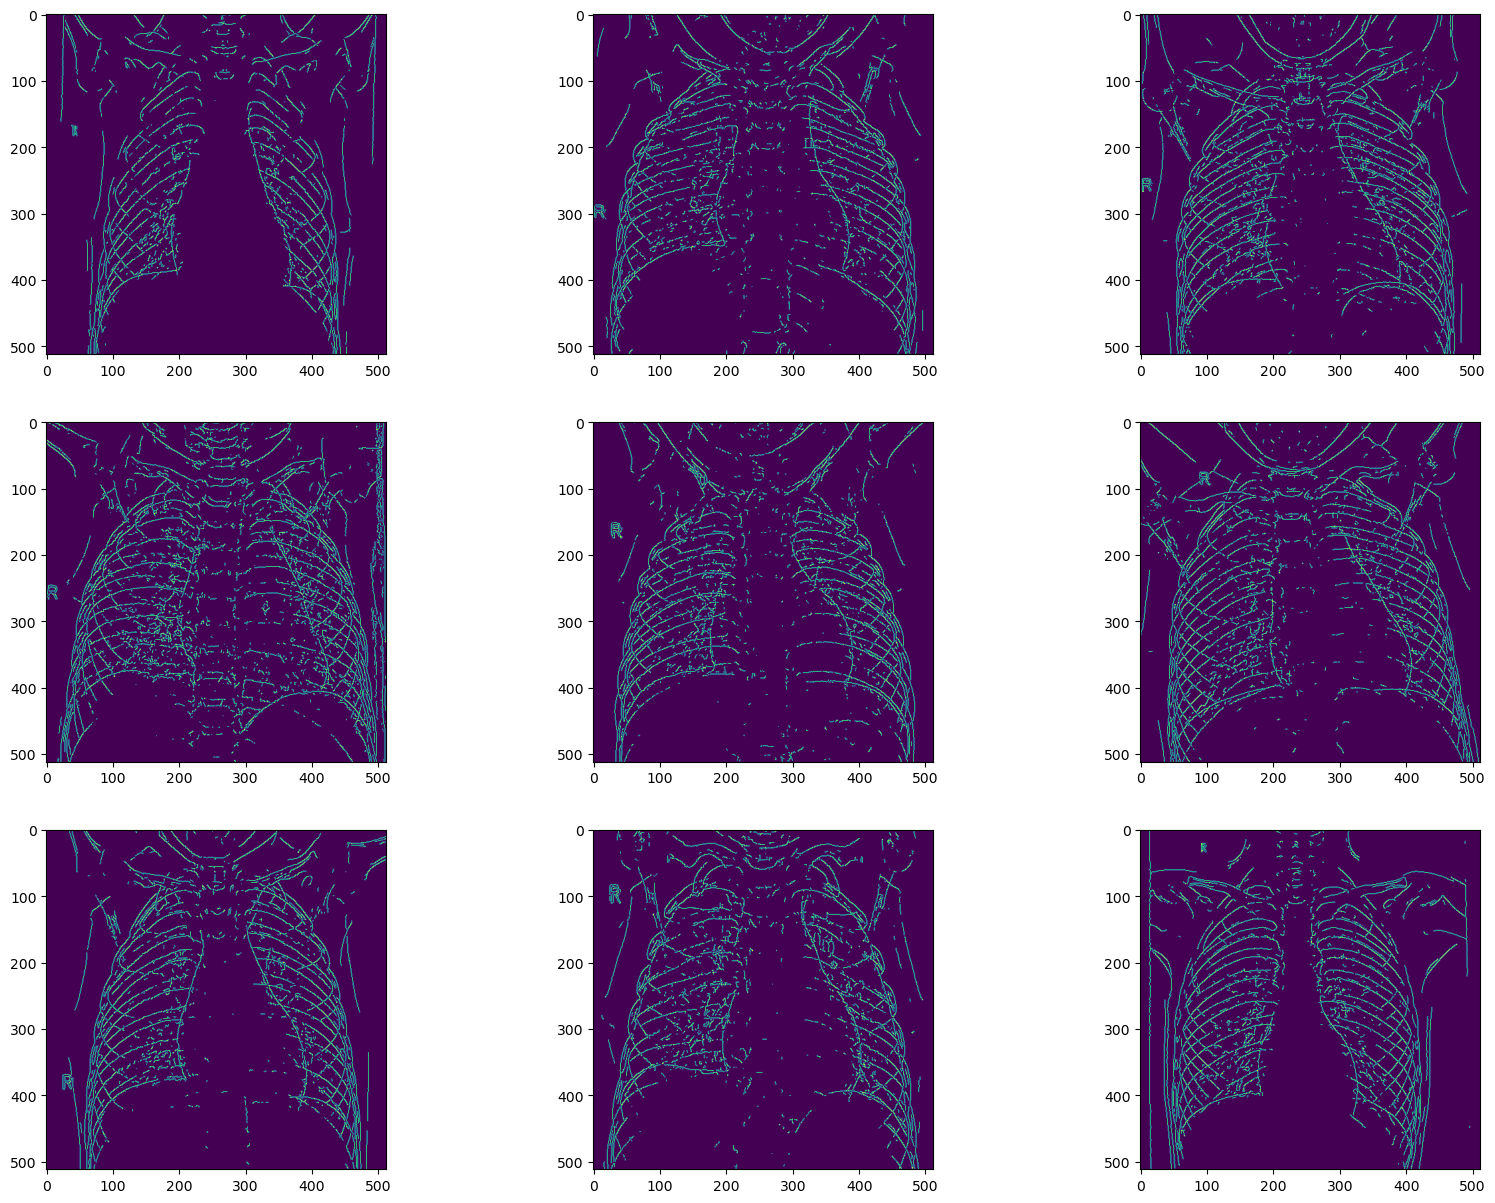

In [14]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected_edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(detected_edges)

# Build Deep Learning Models

In [15]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
validation_dir = "../input/chest-xray-pneumonia/chest_xray/val"

In [16]:
train_datagen = ImageDataGenerator(
            rescale = 1/255.,
            horizontal_flip = True,
            vertical_flip = True,
            rotation_range = 0.3,
            zca_whitening = True,
            width_shift_range = 0.25,
            height_shift_range = 0.25,
            channel_shift_range = 0.35,
            shear_range = 0.2,
            zoom_range = 0.4)

val_test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
test_set = val_test_datagen.flow_from_directory(test_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Cache and Prefetch Data


If we use flow_from_directory along with ImageDataGenerator() to set up the dataset, it will not be compatible with tensorflow.data.AUTOTUNE. Use tensorflow.keras.preprocessing.image_dataset_from_directory instead to load the dataset.

In [17]:
'''
AUTOTUNE = tensorflow.data.experimental.AUTOTUNE

train_set = train_set.cache().prefetch(buffer_size = AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size = AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size = AUTOTUNE)
'''
pass

# Build CNN Model

## What is a convolutional neural network algorithm?

A convolutional neural network (ConvNet / Convolutional neural networks -CNN) is a deep learning algorithm that can take an input image and separate various aspects/objects in the image. CNN is a network architecture for deep learning that learns directly from data. CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series and signal data.

![](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)


## Convolution layer

A convolutional layer is the main building block of a CNN. It contains a set of filters (or kernels) whose parameters will be learned throughout the training. The size of the filters is usually smaller than the actual image. Each filter intertwines with the image and creates an activation map.

![](https://miro.medium.com/max/1400/1*D6iRfzDkz-sEzyjYoVZ73w.gif)


## Convolutional stride

Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video.

![](https://csdl-images.ieeecomputer.org/trans/si/2020/04/figures/ko1ab-2961602.gif)


## Convolutional padding

Padding is a term relevant to convolutional neural networks as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN. For example, if the padding in a CNN is set to zero, then every pixel value that is added will be of value zero.

What does padding ='same' means? In this case, we add 'p' padding layers such that the output image has the same dimensions as the input image. It is called "same" because the output size is the same as the input size (when stride = 1). Using 'same' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model.

![](https://miro.medium.com/max/2000/1*WpOcRWlofm0Z0EDUTKefzg.gif)


## Pooling layer

The purpose of the pooling layers is to reduce the dimensions of the hidden layer by combining the outputs of neuron clusters at the previous layer into a single neuron in the next layer.

![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)

![](https://miro.medium.com/max/1400/1*fXxDBsJ96FKEtMOa9vNgjA.gif)

In [18]:
model1 = Sequential()

#convolutional neural networks - CNNs
model1.add(Conv2D(32, (3,3), strides = (1, 1),activation = "relu", padding = "same", input_shape = (224, 224, 3)))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Conv2D(64, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Conv2D(256, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())

#fully connected layer
model1.add(Dense(128, activation = "relu"))
model1.add(Dense(64, activation = "relu"))
model1.add(Dense(32, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       7

# Compile the Model

In [19]:
model1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

# Train the Model

In [20]:
%%time

early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience = 15,
                                                                    restore_best_weights = True,
                                                                    verbose = 1)

CPU times: user 28 µs, sys: 0 ns, total: 28 µs
Wall time: 33.9 µs


In [21]:
%%time

history = model1.fit_generator(train_set, epochs = 10,
                              validation_data = validation_set,
                              steps_per_epoch = 100,
                              callbacks = [early_stopping_callbacks])

Epoch 1/10


2023-05-24 06:16:53.027502: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


100/100 [==============================] - 61s 530ms/step - loss: 0.7282 - accuracy: 0.7481 - val_loss: 0.7238 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 48s 476ms/step - loss: 0.4810 - accuracy: 0.7581 - val_loss: 0.9322 - val_accuracy: 0.5000
Epoch 3/10
100/100 [==============================] - 47s 466ms/step - loss: 0.4415 - accuracy: 0.7825 - val_loss: 0.4429 - val_accuracy: 0.7500
Epoch 4/10
100/100 [==============================] - 45s 449ms/step - loss: 0.3702 - accuracy: 0.8200 - val_loss: 0.3921 - val_accuracy: 0.8750
Epoch 5/10
100/100 [==============================] - 43s 434ms/step - loss: 0.3544 - accuracy: 0.8444 - val_loss: 0.9088 - val_accuracy: 0.6875
Epoch 6/10
100/100 [==============================] - 44s 437ms/step - loss: 0.3223 - accuracy: 0.8594 - val_loss: 1.1152 - val_accuracy: 0.6250
Epoch 7/10
100/100 [==============================] - 41s 408ms/step - loss: 0.3291 - accuracy: 0.8625 - val_loss: 1.0334 - val_accuracy: 0.6

In [22]:
model1.input, model1.output

(<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'conv2d_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>)

# Visualize the Performance of Model 1

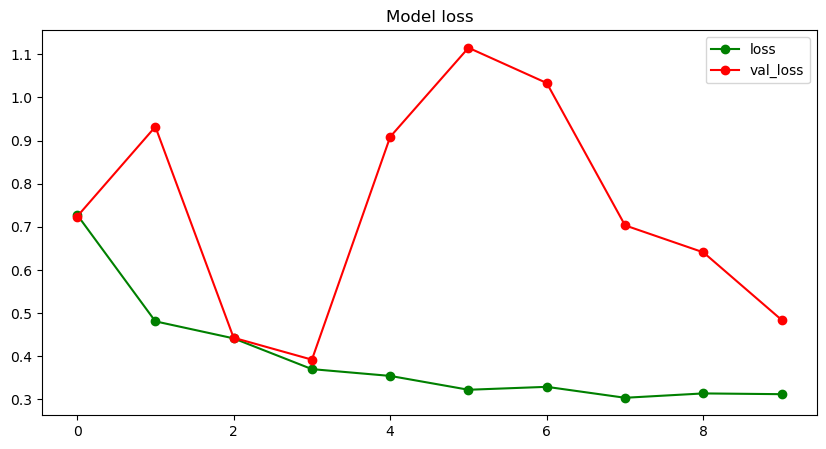

In [23]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

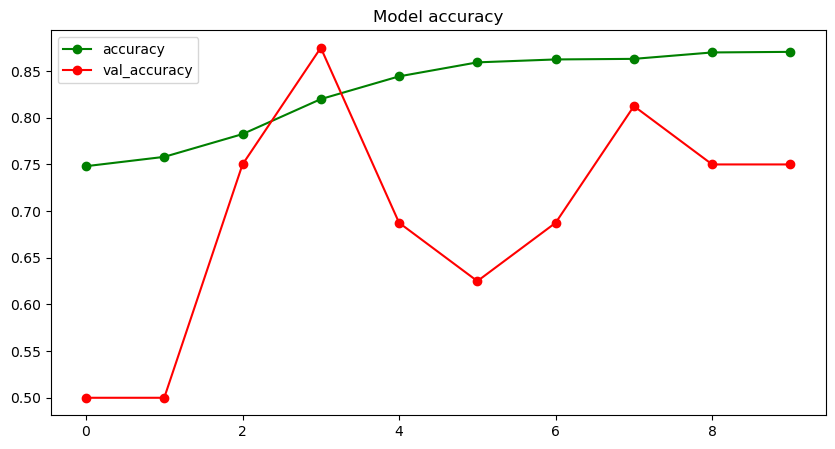

In [24]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")

plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

# Evaluate Model 1 on the Test Set

In [25]:
#scores = model1.evaluate_generator(test_set)
#print("\n%s: %.3f%%" % (model1.metrics_names[0], scores[0]*100))
#print("\n%s: %.3f%%" % (model1.metrics_names[1], scores[1]*100))

test_loss, test_accuracy = model1.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

50/50 [==============================] - 11s 218ms/step - loss: 0.3885 - accuracy: 0.8301
The testing accuracy is:  83.01281929016113 %
The testing loss is:  38.85304033756256 %


# TRANSFER LEARNING

![](https://slideplayer.com/slide/15398015/93/images/5/Transfer+Learning.jpg)

# VGG16

In [26]:
base_model1 = VGG16(include_top = False, weights = "imagenet", input_shape = (224, 224, 3), pooling = "max",
                    classes = 2)

#base_model1.load_weights("../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
base_model1.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [27]:
model2 = Sequential()
model2.add(base_model1)
model2.add(Flatten())

model2.add(Dense(128, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

# freeze the layers
for layer in base_model1.layers:
    layer.trainable = False

model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [28]:
%%time

history = model2.fit_generator(train_set, epochs = 10, validation_data = validation_set, steps_per_epoch = 100,
                               callbacks = [early_stopping_callbacks])

Epoch 1/10
100/100 [==============================] - 46s 417ms/step - loss: 0.3940 - accuracy: 0.8231 - val_loss: 0.4179 - val_accuracy: 0.7500
Epoch 2/10
100/100 [==============================] - 41s 412ms/step - loss: 0.2936 - accuracy: 0.8731 - val_loss: 0.6051 - val_accuracy: 0.7500
Epoch 3/10
100/100 [==============================] - 42s 414ms/step - loss: 0.2951 - accuracy: 0.8650 - val_loss: 0.8583 - val_accuracy: 0.6875
Epoch 4/10
100/100 [==============================] - 42s 415ms/step - loss: 0.2553 - accuracy: 0.8888 - val_loss: 0.6359 - val_accuracy: 0.7500
Epoch 5/10
100/100 [==============================] - 42s 418ms/step - loss: 0.2732 - accuracy: 0.8838 - val_loss: 0.6109 - val_accuracy: 0.7500
Epoch 6/10
100/100 [==============================] - 41s 414ms/step - loss: 0.2487 - accuracy: 0.8919 - val_loss: 0.8670 - val_accuracy: 0.7500
Epoch 7/10
100/100 [==============================] - 42s 420ms/step - loss: 0.2578 - accuracy: 0.8931 - val_loss: 0.9417 - val_ac

# Visualize the Performance of Model 2

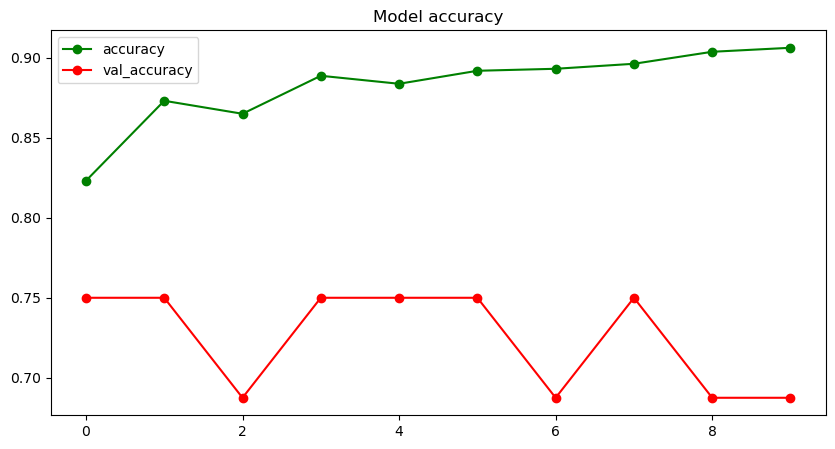

In [29]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

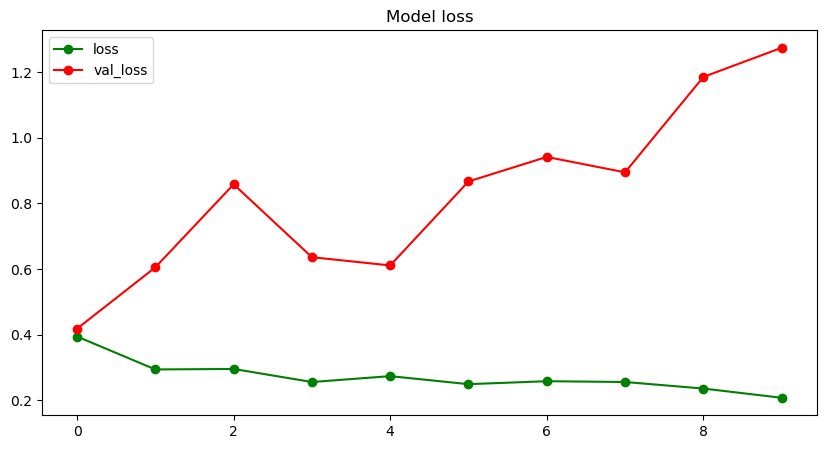

In [30]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

# Evaluate Model 2 on the Test Set

In [31]:
#scores = model1.evaluate_generator(test_set)
#print("\n%s: %.3f%%" % (model1.metrics_names[0], scores[0]*100))
#print("\n%s: %.3f%%" % (model1.metrics_names[1], scores[1]*100))

test_loss, test_accuracy = model2.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

50/50 [==============================] - 8s 149ms/step - loss: 0.3455 - accuracy: 0.8878
The testing accuracy is:  88.78205418586731 %
The testing loss is:  34.5537394285202 %


# Confusion Matrix

_______C o n f u s i o n   m a t r i x_______

20/20 [==============================] - 5s 63ms/step


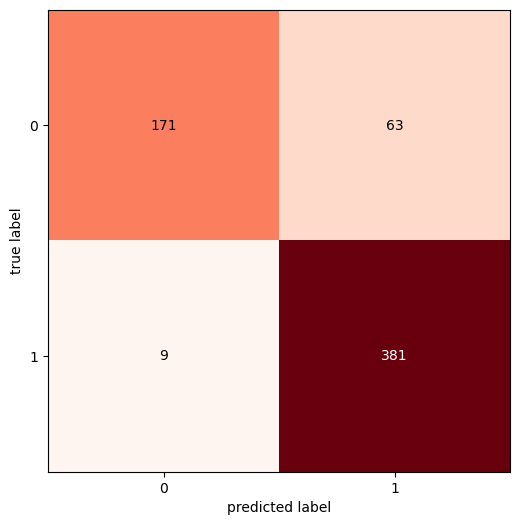

In [68]:
print("_______C o n f u s i o n   m a t r i x_______\n")

predictions = model2.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()

# ResNet50V2

In [32]:
base_model2 = tensorflow.keras.applications.ResNet50V2(weights = "imagenet",
                                                       input_shape = (224, 224, 3),
                                                       pooling = "max", include_top = False,
                                                       classes = 2)

for layer in base_model2.layers:
    layer.trainable = False
    
#base_model2.summary()

94668760/94668760 [==============================] - 4s 0us/step


In [33]:
model3 = Sequential()
model3.add(base_model2)
model3.add(Flatten())

model3.add(Dense(128, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

# freeze the layers
for layer in base_model2.layers:
    layer.trainable = False

model3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [34]:
%%time

history = model3.fit_generator(train_set, epochs = 10, validation_data = validation_set, steps_per_epoch = 100,
                              callbacks = [early_stopping_callbacks])

Epoch 1/10
100/100 [==============================] - 48s 433ms/step - loss: 0.4209 - accuracy: 0.8294 - val_loss: 0.9820 - val_accuracy: 0.6875
Epoch 2/10
100/100 [==============================] - 42s 417ms/step - loss: 0.2571 - accuracy: 0.8925 - val_loss: 0.2335 - val_accuracy: 0.9375
Epoch 3/10
100/100 [==============================] - 41s 413ms/step - loss: 0.2450 - accuracy: 0.8900 - val_loss: 0.2782 - val_accuracy: 0.9375
Epoch 4/10
100/100 [==============================] - 41s 408ms/step - loss: 0.2299 - accuracy: 0.9069 - val_loss: 0.3622 - val_accuracy: 0.8750
Epoch 5/10
100/100 [==============================] - 42s 414ms/step - loss: 0.2257 - accuracy: 0.9112 - val_loss: 0.3361 - val_accuracy: 0.8125
Epoch 6/10
100/100 [==============================] - 41s 414ms/step - loss: 0.1808 - accuracy: 0.9212 - val_loss: 0.3727 - val_accuracy: 0.8750
Epoch 7/10
100/100 [==============================] - 41s 414ms/step - loss: 0.1895 - accuracy: 0.9231 - val_loss: 0.3707 - val_ac

# Visualize Performance of Model 3

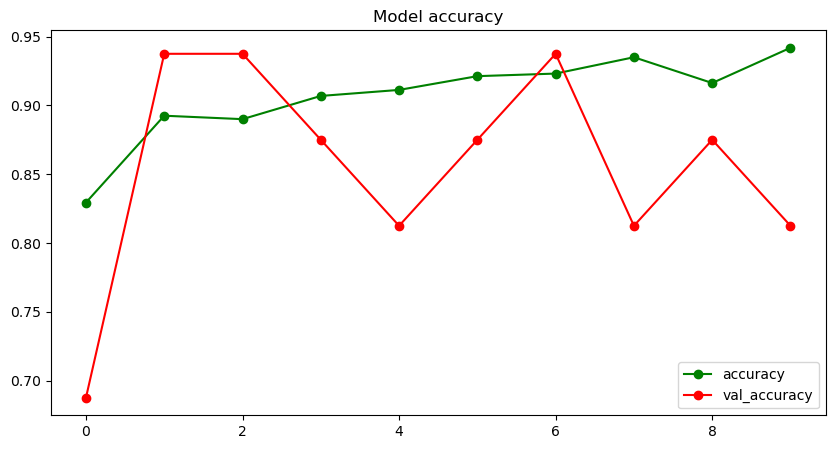

In [35]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

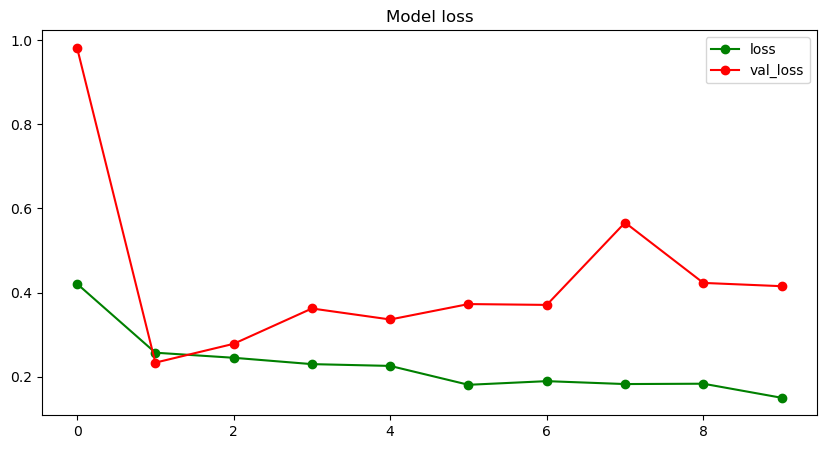

In [36]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

# Evaluate Model 3 on the Test Set

In [37]:
test_loss, test_accuracy = model3.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

50/50 [==============================] - 7s 147ms/step - loss: 0.2857 - accuracy: 0.8910
The testing accuracy is:  89.10256624221802 %
The testing loss is:  28.56665849685669 %


# Confusion Matrix

_______C o n f u s i o n   m a t r i x_______

20/20 [==============================] - 1s 53ms/step


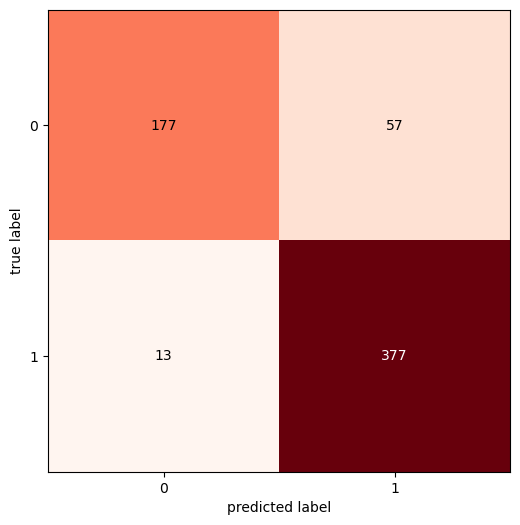

In [69]:
print("_______C o n f u s i o n   m a t r i x_______\n")

predictions = model3.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()

# DenseNet

In [38]:
base_model3 = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

29084464/29084464 [==============================] - 2s 0us/step


In [39]:
model4 = Sequential()
model4.add(base_model3)
model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

# Freeze the layers
for layer in base_model3.layers:
    layer.trainable = False

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
%%time

history = model4.fit_generator(train_set, epochs=10, validation_data=validation_set, steps_per_epoch=100,
                               callbacks=[early_stopping_callbacks])

Epoch 1/10
100/100 [==============================] - 53s 445ms/step - loss: 0.3958 - accuracy: 0.8200 - val_loss: 0.5061 - val_accuracy: 0.7500
Epoch 2/10
100/100 [==============================] - 42s 418ms/step - loss: 0.3106 - accuracy: 0.8600 - val_loss: 0.5145 - val_accuracy: 0.8125
Epoch 3/10
100/100 [==============================] - 43s 428ms/step - loss: 0.2584 - accuracy: 0.8906 - val_loss: 0.4383 - val_accuracy: 0.7500
Epoch 4/10
100/100 [==============================] - 41s 415ms/step - loss: 0.2368 - accuracy: 0.8944 - val_loss: 0.5229 - val_accuracy: 0.7500
Epoch 5/10
100/100 [==============================] - 42s 421ms/step - loss: 0.2674 - accuracy: 0.8906 - val_loss: 0.5910 - val_accuracy: 0.7500
Epoch 6/10
100/100 [==============================] - 42s 418ms/step - loss: 0.2241 - accuracy: 0.9081 - val_loss: 0.5465 - val_accuracy: 0.8125
Epoch 7/10
100/100 [==============================] - 42s 423ms/step - loss: 0.2241 - accuracy: 0.9087 - val_loss: 0.4275 - val_ac

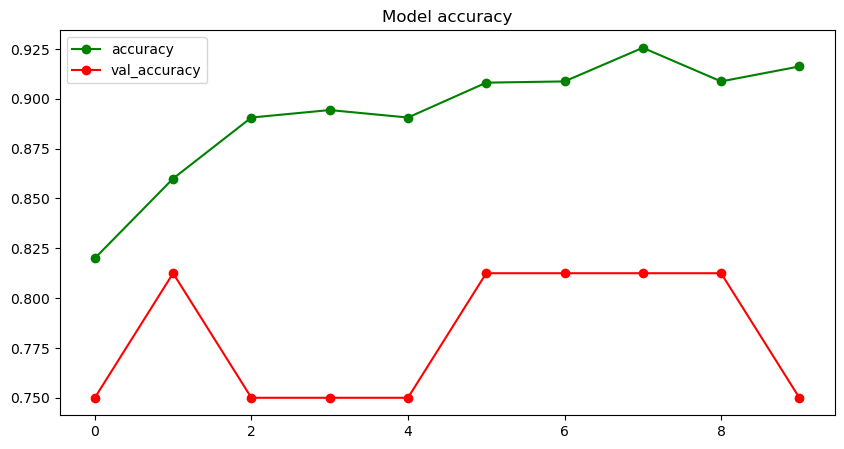

In [41]:
plt.figure(figsize=(10, 5))
plt.title('Model accuracy')
plt.plot(history.history['accuracy'], 'go-')
plt.plot(history.history['val_accuracy'], 'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

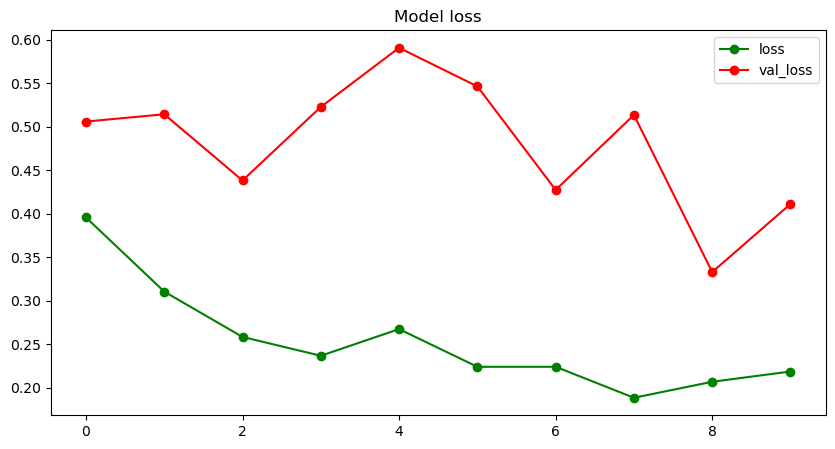

In [42]:
plt.figure(figsize=(10, 5))
plt.title('Model loss')
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()

In [43]:
test_loss, test_accuracy = model4.evaluate(test_set, steps=50)
print('The testing accuracy is:', test_accuracy * 100, '%')
print('The testing loss is:', test_loss * 100, '%')

50/50 [==============================] - 8s 151ms/step - loss: 0.2668 - accuracy: 0.8926
The testing accuracy is: 89.26281929016113 %
The testing loss is: 26.67832374572754 %


# Confusion Matrix

_______C o n f u s i o n   m a t r i x_______

20/20 [==============================] - 4s 56ms/step


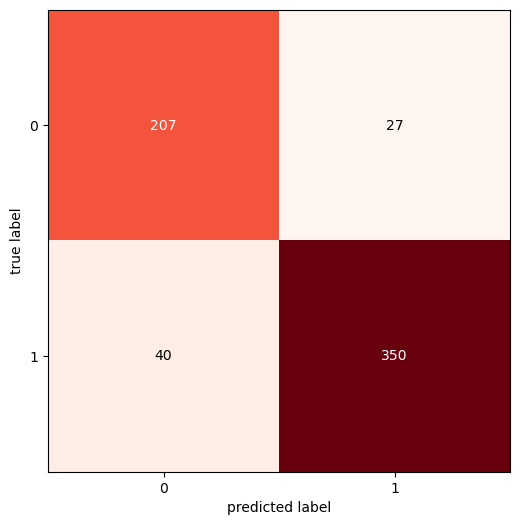

In [70]:
print("_______C o n f u s i o n   m a t r i x_______\n")

predictions = model4.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()

# Inception

In [44]:
base_model4 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

87910968/87910968 [==============================] - 4s 0us/step


In [45]:
model5 = Sequential()
model5.add(base_model4)
model5.add(Flatten())

model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

# Freeze the layers
for layer in base_model4.layers:
    layer.trainable = False

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
%%time

history = model5.fit_generator(train_set, epochs=10, validation_data=validation_set, steps_per_epoch=100,
                               callbacks=[early_stopping_callbacks])

Epoch 1/10
100/100 [==============================] - 50s 439ms/step - loss: 0.4722 - accuracy: 0.7837 - val_loss: 0.5562 - val_accuracy: 0.6250
Epoch 2/10
100/100 [==============================] - 42s 418ms/step - loss: 0.3073 - accuracy: 0.8625 - val_loss: 0.4969 - val_accuracy: 0.7500
Epoch 3/10
100/100 [==============================] - 42s 419ms/step - loss: 0.2938 - accuracy: 0.8825 - val_loss: 0.4276 - val_accuracy: 0.8750
Epoch 4/10
100/100 [==============================] - 41s 409ms/step - loss: 0.2756 - accuracy: 0.8750 - val_loss: 0.6976 - val_accuracy: 0.6250
Epoch 5/10
100/100 [==============================] - 42s 424ms/step - loss: 0.2946 - accuracy: 0.8719 - val_loss: 0.4133 - val_accuracy: 0.7500
Epoch 6/10
100/100 [==============================] - 42s 417ms/step - loss: 0.2425 - accuracy: 0.8906 - val_loss: 0.4079 - val_accuracy: 0.7500
Epoch 7/10
100/100 [==============================] - 41s 412ms/step - loss: 0.2524 - accuracy: 0.8969 - val_loss: 0.6045 - val_ac

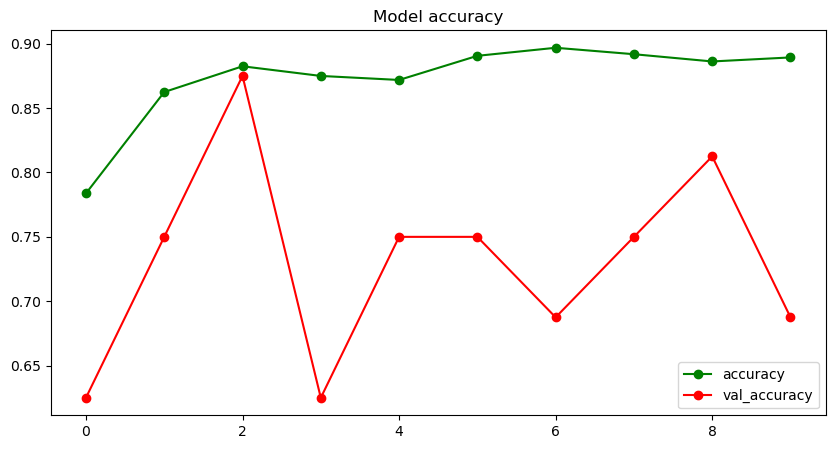

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Model accuracy')
plt.plot(history.history['accuracy'], 'go-')
plt.plot(history.history['val_accuracy'], 'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

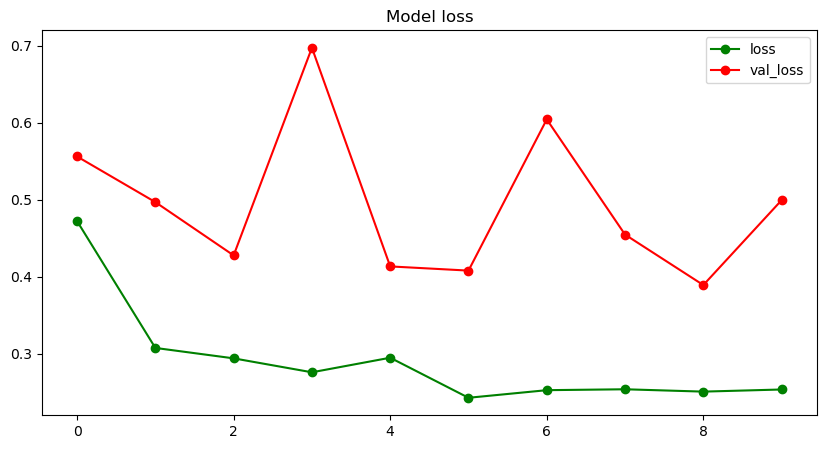

In [48]:
plt.figure(figsize=(10, 5))
plt.title('Model loss')
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()

In [49]:
test_loss, test_accuracy = model5.evaluate(test_set, steps=50)
print('The testing accuracy is:', test_accuracy * 100, '%')
print('The testing loss is:', test_loss * 100, '%')

50/50 [==============================] - 8s 152ms/step - loss: 0.4456 - accuracy: 0.8125
The testing accuracy is: 81.25 %
The testing loss is: 44.5607453584671 %


# Confusion Matrix

_______C o n f u s i o n   m a t r i x_______

20/20 [==============================] - 3s 47ms/step


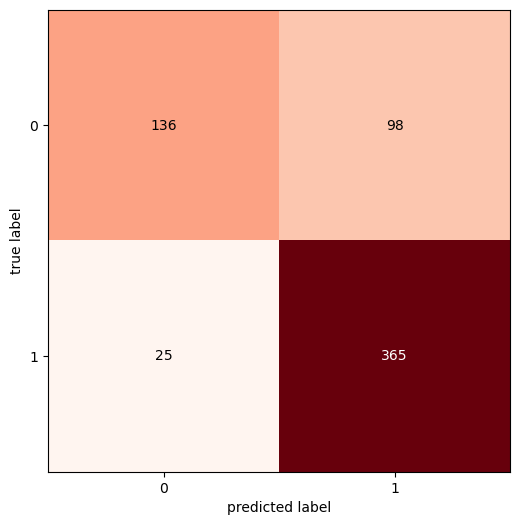

In [71]:
print("_______C o n f u s i o n   m a t r i x_______\n")

predictions = model5.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()

# Xception

In [50]:
base_model5 = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

83683744/83683744 [==============================] - 5s 0us/step


In [51]:
model6 = Sequential()
model6.add(base_model5)
model6.add(Flatten())

model6.add(Dense(128, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

# Freeze the layers
for layer in base_model5.layers:
    layer.trainable = False

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
%%time

history = model6.fit_generator(train_set, epochs=10, validation_data=validation_set, steps_per_epoch=100,
                               callbacks=[early_stopping_callbacks])

Epoch 1/10
100/100 [==============================] - 48s 426ms/step - loss: 0.3614 - accuracy: 0.8375 - val_loss: 0.4922 - val_accuracy: 0.8125
Epoch 2/10
100/100 [==============================] - 42s 423ms/step - loss: 0.2855 - accuracy: 0.8744 - val_loss: 0.3938 - val_accuracy: 0.8125
Epoch 3/10
100/100 [==============================] - 43s 428ms/step - loss: 0.2332 - accuracy: 0.8944 - val_loss: 0.4970 - val_accuracy: 0.7500
Epoch 4/10
100/100 [==============================] - 42s 422ms/step - loss: 0.2462 - accuracy: 0.8894 - val_loss: 0.3552 - val_accuracy: 0.8125
Epoch 5/10
100/100 [==============================] - 42s 422ms/step - loss: 0.2387 - accuracy: 0.9075 - val_loss: 0.5048 - val_accuracy: 0.8125
Epoch 6/10
100/100 [==============================] - 43s 425ms/step - loss: 0.2353 - accuracy: 0.9031 - val_loss: 0.3810 - val_accuracy: 0.7500
Epoch 7/10
100/100 [==============================] - 45s 445ms/step - loss: 0.2071 - accuracy: 0.9175 - val_loss: 0.4341 - val_ac

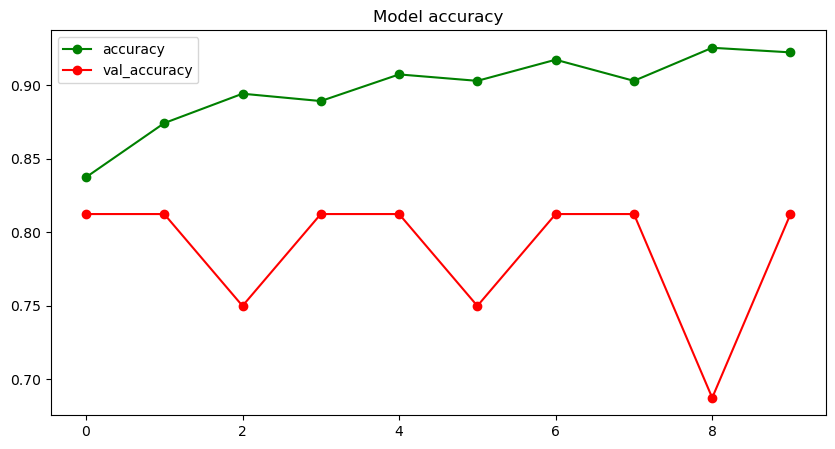

In [53]:
plt.figure(figsize=(10, 5))
plt.title('Model accuracy')
plt.plot(history.history['accuracy'], 'go-')
plt.plot(history.history['val_accuracy'], 'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

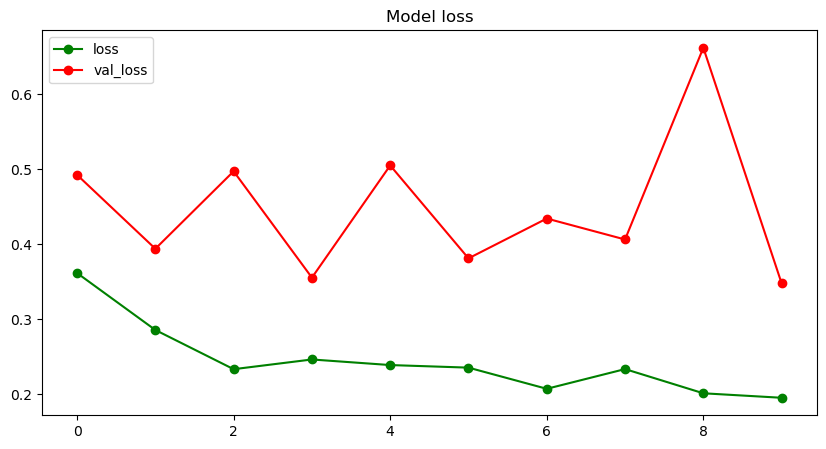

In [54]:
plt.figure(figsize=(10, 5))
plt.title('Model loss')
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()

In [55]:
test_loss, test_accuracy = model6.evaluate(test_set, steps=50)
print('The testing accuracy is:', test_accuracy * 100, '%')
print('The testing loss is:', test_loss * 100, '%')

50/50 [==============================] - 8s 155ms/step - loss: 0.3245 - accuracy: 0.8702
The testing accuracy is: 87.0192289352417 %
The testing loss is: 32.44757354259491 %


# Confusion Matrix

_______C o n f u s i o n   m a t r i x_______

20/20 [==============================] - 3s 72ms/step


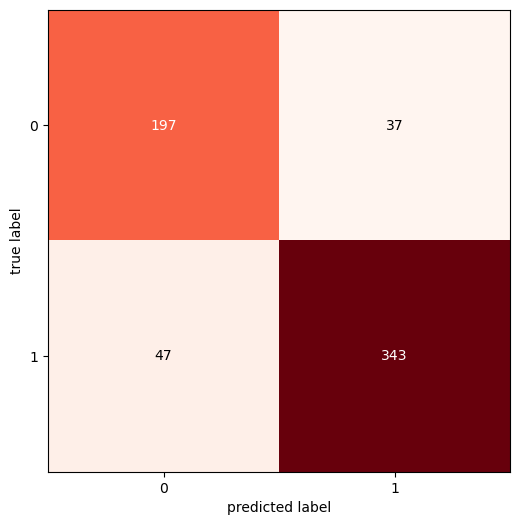

In [72]:
print("_______C o n f u s i o n   m a t r i x_______\n")

predictions = model6.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()

# Prediction of a New Image

In [75]:
%%time

new_image_path = "/kaggle/input/pneumonia-lungs/download.jpg"
test_image = image.load_img(new_image_path, target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#test_image = np.reshape(test_image, (1, 224, 224, 3))
test_image = test_image / 255



result = model4.predict(test_image)
train_set.class_indices
if result[0][0] == 0:
    prediction = "N O R M A L"
else:
    prediction = "P N E U M O N I A"

print(prediction)

1/1 [==============================] - 0s 289ms/step
P N E U M O N I A
CPU times: user 345 ms, sys: 998 µs, total: 346 ms
Wall time: 380 ms


# Save the Model to Disk

In [76]:
model4.save("my_pneumonia_detection_model.h5")
print(colored("Model was succesfully saved to disk...", color = "green", attrs = ["bold", "dark"]))

Model was succesfully saved to disk...


# Some time later may need the model to use

In [77]:
model_loaded = tensorflow.keras.models.load_model("/kaggle/working/my_pneumonia_detection_model.h5")
model_loaded.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               131200    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,179,073
Trainable params: 141,569
Non-

# Use Loaded Model to Predict New Image

1/1 [==============================] - 2s 2s/step
This image is 99.517 percent P N E U M O N I A


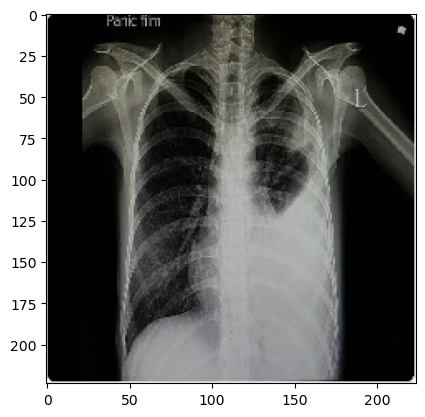

In [78]:
def image_prediction(new_image_path):
    test_image = image.load_img(new_image_path, target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    #test_image = np.reshape(test_image, (224, 224, 3))
    test_image = np.expand_dims(test_image, axis = 0)
    test_image = test_image / 255.0
    model_loaded = tensorflow.keras.models.load_model("/kaggle/working/my_pneumonia_detection_model.h5")
    prediction = model_loaded.predict(test_image)
    test_image_for_plotting = image.load_img(new_image_path, target_size = (224, 224))
    plt.imshow(test_image_for_plotting)
    if(prediction[0] > 0.5):
        statistic = prediction[0] * 100 
        print("This image is %.3f percent %s"% (statistic, "P N E U M O N I A"))
    else:
        statistic = (1.0 - prediction[0]) * 100
        print("This image is %.3f percent %s" % (statistic, "N O R M A L"))
     
 
# call and use the function
image_prediction("/kaggle/input/pneumonia-lung-image-for-test/image.webp")

# Get Test data and Test labels

In [79]:
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
test_data, test_labels = [], []

In [80]:
for i in ["/NORMAL/", "/PNEUMONIA/"]:
    for image in (os.listdir(test_dir + i)):
        image = plt.imread(test_dir + i + image)
        image = cv2.resize(image, (224, 224))
        image = np.dstack([image, image, image])
        image = image.astype("float32") / 255
        if i == "/NORMAL/":
            label = 0
        elif i == "/PNEUMONIA/":
            label = 1
        test_data.append(image)
        test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Test Metrics

In [81]:
%%time

precision = tp / (tp + fp) * 100
recall = tp / (tp + fn) * 100
print("Accuracy: {}%".format(acc))
print("Precision: {}%".format(precision))
print("Recall: {}%".format(recall))
print("F1-score: {}".format(2 * precision * recall / (precision + recall)))   

Accuracy: 86.53846153846155%
Precision: 90.26315789473685%
Recall: 87.94871794871794%
F1-score: 89.09090909090911
CPU times: user 180 µs, sys: 2 µs, total: 182 µs
Wall time: 174 µs


# Display Correct and Incorrect Predicted Classes

In [82]:
predictions = list()
preds = model_loaded.predict(test_data)
for i in preds:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
predictions[:15]

20/20 [==============================] - 4s 59ms/step


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**np.nonzero() function is used to compute the indices of the elements that are non-zero**

In [83]:
correct_predictions = np.nonzero(predictions == test_labels)[0]
incorrect_predictions = np.nonzero(predictions != test_labels)[0]

# let's look at indices of correct predictions
print("Indices of correct predictions:\n", correct_predictions[:15])

# let's look at indices of incorrect correct predictions
print("\nIndices of incorrect predictions:\n", incorrect_predictions[:15])

Indices of correct predictions:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Indices of incorrect predictions:
 [ 18  21  25  26  31  53  71  73  78  90  95 101 109 113 125]


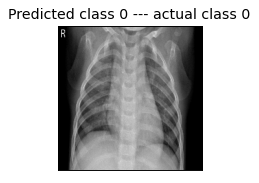

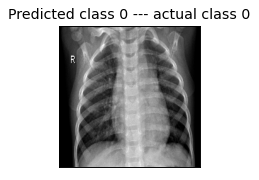

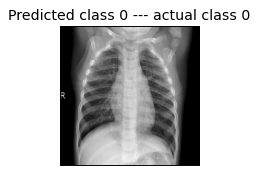

In [84]:
# display correct predictions

i = 0
for a in correct_predictions[:3]:
    plt.figure(figsize = (8, 6), dpi = 85)
    plt.subplot(3, 1, i + 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(test_data[a].reshape(224, 224, 3))
    plt.title("Predicted class {} --- actual class {}".format(predictions[a], test_labels[a]))
    plt.tight_layout()
    i += 1

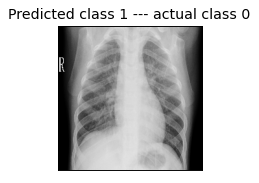

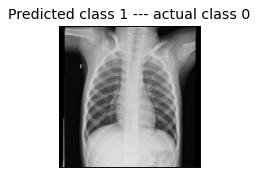

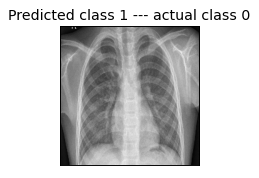

In [85]:
# display incorrect predictions

i = 0
for a in incorrect_predictions[:3]:
    plt.figure(figsize = (8, 6), dpi = 85)
    plt.subplot(3, 1, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[a].reshape(224, 224, 3))
    plt.title("Predicted class {} --- actual class {}".format(predictions[a], test_labels[a]))
    plt.tight_layout()
    i += 1